In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import naive_bayes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
def autolabel(rect):
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

In [3]:
df = pd.read_csv("data.csv")
df.head()

,vote,user,user_url,star,level,release_time,content
0,0,乐小妖,https://www.douban.com/people/184351511/,50.0,力荐,2020-01-06,喜欢那个打黑拳！！
1,0,非著名相声演员,https://www.douban.com/people/163544561/,30.0,还行,2020-01-06,还可以吧。
2,0,alexia,https://www.douban.com/people/alexia/,40.0,推荐,2020-01-06,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...
3,0,姚暴富,https://www.douban.com/people/l92599/,20.0,较差,2020-01-06,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。
4,0,刺猬,https://www.douban.com/people/wwwwww0211/,30.0,还行,2020-01-06,适合消遣看看，破梗废话太多……


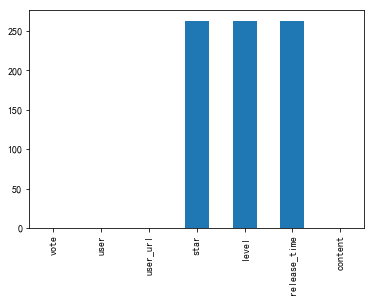

In [4]:
# 检查缺失值
df.isnull().sum(axis=0).plot.bar()

In [5]:
df = df.dropna()
df["release_time"] = pd.to_datetime(df["release_time"])
df = df.set_index("release_time")
df.head()

,vote,user,user_url,star,level,content
release_time,,,,,,
2020-01-06,0,乐小妖,https://www.douban.com/people/184351511/,50.0,力荐,喜欢那个打黑拳！！
2020-01-06,0,非著名相声演员,https://www.douban.com/people/163544561/,30.0,还行,还可以吧。
2020-01-06,0,alexia,https://www.douban.com/people/alexia/,40.0,推荐,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...
2020-01-06,0,姚暴富,https://www.douban.com/people/l92599/,20.0,较差,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。
2020-01-06,0,刺猬,https://www.douban.com/people/wwwwww0211/,30.0,还行,适合消遣看看，破梗废话太多……


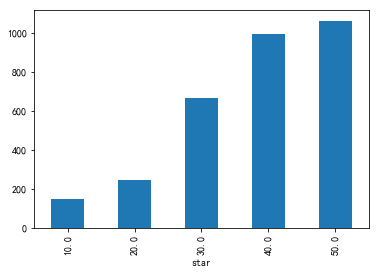

In [6]:
# 评分等级条形图
df.groupby("star")["star"].count().plot.bar()

In [7]:
# 用户评论数量排序
df.groupby("user")["user"].count().sort_values(ascending=False)[:20]

user
[已注销]     60
已注销       12
Allen      3
Flora      2
卷卷         2
NEMO       2
猫小爷        2
豆瓣酱        2
六月         2
水中游鱼       2
Phoebe     2
leo        2
豆爸         2
无为         2
z          2
流言         2
艾瑞巴蒂       2
S          2
kevin      2
无言         2
Name: user, dtype: int64

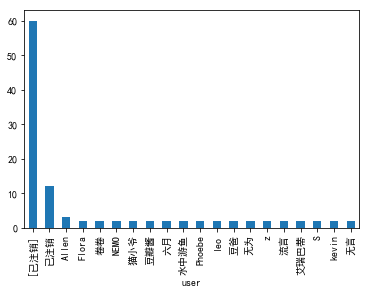

In [8]:
# 用户评论数量排序条形图
df.groupby("user")["user"].count().sort_values(ascending=False)[:20].plot.bar()

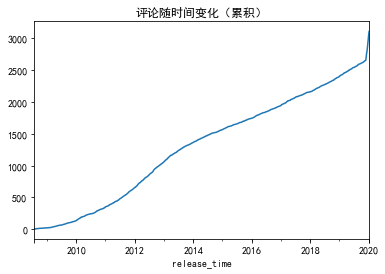

In [9]:
# 评论随时间变化（累积）
df_day = df.to_period('D')
df_day.groupby(df_day.index)["content"].count().cumsum().plot(title='评论随时间变化（累积）')

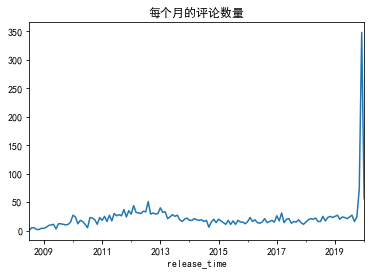

In [10]:
# 每个月的评论数量
df_day = df.to_period('M')
df_day.groupby(df_day.index)["content"].count().plot(title="每个月的评论数量")

In [11]:
df.sort_values(by="vote", ascending=False)[:50]

,vote,user,user_url,star,level,content
release_time,,,,,,
2013-06-10,335,水湄物语,https://www.douban.com/people/foxsshome/,20.0,较差,@棠华 完全不好看啊，我不喜欢这种天纵奇才的设定，武功天下无敌，背景深不可测，加上英俊无比...
2015-08-28,304,鱼丸粗面,https://www.douban.com/people/sampaning/,30.0,还行,YY的连我这看书的人都有点不好意思了，上来就无耻地穿越到小孩身上（人小鬼大），还身怀天脉，过...
2015-06-29,189,川总,https://www.douban.com/people/reflect/,10.0,很差,难负盛名，废话连篇
2013-10-06,188,时间.世界,https://www.douban.com/people/1998897/,20.0,较差,1星半。
2016-12-07,71,贝利撒留.ape,https://www.douban.com/people/43340854/,50.0,力荐,发现一个神奇的现象，给这本网络小说打低分并给予负面评价的网友里，很多都给按他们的标准更差的小...
2013-09-15,64,红药石,https://www.douban.com/people/hongyaoshi/,20.0,较差,看过，中途弃书，作者一看就是个喜欢YY的男生，左右逢源，集万千高富美宠爱于一身，此等设定让我...
2010-02-05,64,苦茶,https://www.douban.com/people/Wangtanzhi/,20.0,较差,语言粗糙，故事混乱。不值得推荐。看了近一半之后，废弃不观。
2014-06-30,59,恶魔奶爸Sam,https://www.douban.com/people/Q598176297/,30.0,还行,主角太讨人厌，看了一半看不下去了，搜了下结局，剧透的连底裤都透掉了，继承了猫腻一如既往结尾不...
2015-06-12,39,喵咪,https://www.douban.com/people/42444039/,20.0,较差,根本看不下去，完全不明白为什么好评那么多……


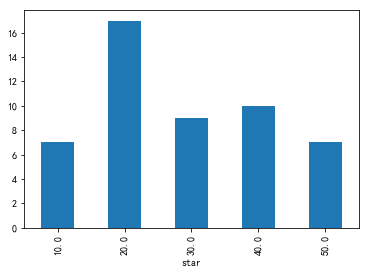

In [12]:
# 高赞的50个评论的评分等级条形图
df.sort_values(by="vote", ascending=False)[:50].groupby("star")["star"].count().plot.bar()

In [13]:
# 根据评分划分情感倾向
df.loc[df["star"] <= 30,'sentiment'] = 0
df.loc[df["star"] > 30,'sentiment'] = 1
df.head()

,vote,user,user_url,star,level,content,sentiment
release_time,,,,,,,
2020-01-06,0,乐小妖,https://www.douban.com/people/184351511/,50.0,力荐,喜欢那个打黑拳！！,1.0
2020-01-06,0,非著名相声演员,https://www.douban.com/people/163544561/,30.0,还行,还可以吧。,0.0
2020-01-06,0,alexia,https://www.douban.com/people/alexia/,40.0,推荐,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...,1.0
2020-01-06,0,姚暴富,https://www.douban.com/people/l92599/,20.0,较差,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。,0.0
2020-01-06,0,刺猬,https://www.douban.com/people/wwwwww0211/,30.0,还行,适合消遣看看，破梗废话太多……,0.0


In [16]:
# 分词函数，没有停用词
def space_cut(intxt):
    return " ".join([w for w in jieba.cut(intxt)])

def list_cut(intxt):
    return [w for w in jieba.cut(intxt)]

# 将语料分词
df["cut"] = df["content"].apply(list_cut)
df.head()

,vote,user,user_url,star,level,content,sentiment,cut
release_time,,,,,,,,
2020-01-06,0,乐小妖,https://www.douban.com/people/184351511/,50.0,力荐,喜欢那个打黑拳！！,1.0,"[喜欢, 那个, 打黑, 拳, ！, ！]"
2020-01-06,0,非著名相声演员,https://www.douban.com/people/163544561/,30.0,还行,还可以吧。,0.0,"[还, 可以, 吧, 。]"
2020-01-06,0,alexia,https://www.douban.com/people/alexia/,40.0,推荐,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...,1.0,"[其实, 已经, 一口气, 狂, 看到, 了, 第七卷, 。, 前半, 的, 节奏, 还是,..."
2020-01-06,0,姚暴富,https://www.douban.com/people/l92599/,20.0,较差,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。,0.0,"[2020, 年头, 的, 几天, 假期, 啥事, 没干, ，, 就, 看, 这, 几百万,..."
2020-01-06,0,刺猬,https://www.douban.com/people/wwwwww0211/,30.0,还行,适合消遣看看，破梗废话太多……,0.0,"[适合, 消遣, 看看, ，, 破梗, 废话, 太, 多, …, …]"


In [ ]:
vect = CountVectorizer()
term_matrix = DataFrame(vect.fit_transform(X_train.cuted_comment).toarray(), columns=vect.get_feature_names())